# Exploration of Issue Data from React Repository

In [10]:
import operator
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from classifier import *
from issues import *

## Issue Data Summary

In [11]:
with open('data/react/react_issues_closed.json') as f:
    closed_issues = json.load(f)
print(str(len(closed_issues)) + ' closed issues')
with open('data/react/react_issues_open.json') as f:
    open_issues = json.load(f)
print(str(len(open_issues)) + ' open issues')

5575 closed issues
379 open issues


In [12]:
get_issue_by_title(closed_issues, "Extract react prop from ref")

[{'url': 'https://api.github.com/repos/facebook/react/issues/12903',
  'repository_url': 'https://api.github.com/repos/facebook/react',
  'labels_url': 'https://api.github.com/repos/facebook/react/issues/12903/labels{/name}',
  'comments_url': 'https://api.github.com/repos/facebook/react/issues/12903/comments',
  'events_url': 'https://api.github.com/repos/facebook/react/issues/12903/events',
  'html_url': 'https://github.com/facebook/react/issues/12903',
  'id': 326290102,
  'number': 12903,
  'title': 'Extract react prop from ref',
  'user': {'login': 'gk159yo',
   'id': 18729755,
   'avatar_url': 'https://avatars3.githubusercontent.com/u/18729755?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gk159yo',
   'html_url': 'https://github.com/gk159yo',
   'followers_url': 'https://api.github.com/users/gk159yo/followers',
   'following_url': 'https://api.github.com/users/gk159yo/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gk159yo/gists{/gist_

### Issues that are classified as trivial or documentation changes are labeled 'True', all other issues are labeled as 'False'.

Text(0.5,1,'open issue labels')

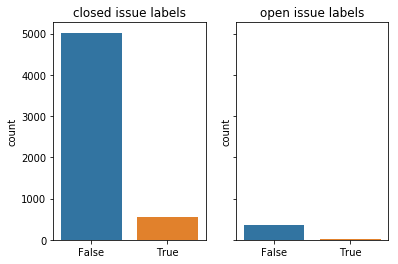

In [13]:
closed_labels = classify_issues(closed_issues)
open_labels = classify_issues(open_issues)

ig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(closed_labels, ax=ax1).set_title("closed issue labels")
sns.countplot(open_labels, ax=ax2).set_title("open issue labels")

In [14]:
pos_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if closed_labels[i]]
neg_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if not closed_labels[i]]
pos_issues_open = [issue for (i,issue) in enumerate(open_issues) if open_labels[i]]
neg_issues_open = [issue for (i,issue) in enumerate(open_issues) if not open_labels[i]]

## Exploration of Positive Labeled Issues

In [15]:
# Print a sample of positive label titles
print("positive label titles: ")
for issue in pos_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

positive label titles: 
	"fix docs rake "update_version" command to strip trailing spaces"
	"docs don't even mention reconciliation!"
	"jsx page gives 404 - linked from "why react" blog post"
	"stop requiring docblock for jsx transformer"
	"document forms changes / best practices"
	"better event docs"
	"few issues in the (upcoming) doc"
	"docblock parsing fails with \r\n"
	"link to cdnjs in docs"
	"old jsfiddle links in docs"
	"generate docs using jsdoc (or something)."
	"react broken in safari 5.1.1"
	"fails on whole-document rendering"
	"support onmouseover"
	"docco-style documentation"
	"documentation - createclass and rendercomponent too vague, add more links"
	"fix direct uses of document and global"
	"get rid of sanitize dependency in docs"
	"add a link in each warning to doc pages "
	"document selection and composition events on reference page"


### The classifier misclassifies some examples as documentation/trivial issues that are more complex upon manual inspection. Example below is an issue that was flagged despite being a significant code change with a lot of discussion around it.

In [16]:
misclass_issue = get_issue_by_title(pos_issues_closed, "null props considered differently in getdefaultprops vs. isrequired")
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: null props considered differently in getdefaultprops vs. isrequired

body: in the case a `null` argument is passed to a property marked as `isrequired`:http://jsfiddle.net/jeanlauliac/0n6snb6b/1/we'll get a proper warning in the console: `warning: required prop `name` was not specified in `hello`.` (though it should probably be "prop was null" and not "prop was not specified", but anyway)on the other hand, the default value is only used when the prop is `undefined`, but not when it's `null`. is this the explicitly wanted behavior? if it is, then we should probably make the documentation explicit about it (http://facebook.github.io/react/docs/reusable-components.html), giving the entire responsibility to component callers of safeguarding against `null`.


## Exploration of Negative Labeled Issues

In [17]:
print("negative label titles: ")
for issue in neg_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

negative label titles: 
	"can't require() react-tools module"
	"write tests for react-tools module"
	"must adding comments for jsx?"
	"small update to bower command"
	"make valid npm release"
	"react in requirejs ?"
	"is es5-sham required for ie8?"
	"uncaught syntaxerror: unexpected token < "
	"work with compile-to-js languages (like coffeescript)"
	"the name "jsx" is already taken, use "xjs" instead?"
	"jsx not able to watch subdirs"
	"jsx whitespace coalescing should work like regular html"
	"automatically bind scope of all user provided methods."
	"jsx offline transform exits with error code 1 on any change (ubuntu 12.10)"
	"allow namespacing in component names in jsx"
	"ordering of componentdidmount events"
	"preserve line numbers in "grunt test""
	"grunt test just hangs"
	"bin/jsx should not relativize required module ids unless --relativize is passed"
	"support comments in jsx"


### The classifier misses some examples that upon further inspection are clearly simple changes. Example below is an issue that was resolved by simply changing a single URL in a markdown file.

In [18]:
misclass_issue = get_issue_by_title(neg_issues_closed, 'small update to bower command')
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: small update to bower command

body: it could be preferable to use:```bower install --save react```so that the installation is automatically saved in the `bower.json`.


## Comparsion of Issue Classes

In [19]:
neg_issues_freqs = sorted(get_word_freq_title(neg_issues_closed).items(), key=lambda x: x[1], reverse=True)
pos_issues_freqs = sorted(get_word_freq_title(pos_issues_closed).items(), key=lambda x: x[1], reverse=True)

# print top 20 words for negative issues
print("Top words in Negative Issue Titles: ")
for (word, freq) in neg_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Titles: ")
for (word, freq) in pos_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Titles: 
	react: 0.024793686258964286
	component: 0.012396843129482143
	error: 0.01066705106490324
	render: 0.007207466935745433
	using: 0.006414645572813435
	event: 0.006414645572813435
	jsx: 0.006378608238134707
	dom: 0.006378608238134707
	components: 0.006270496234098526
	input: 0.005910122887311254
	doesnt: 0.005441637536487801
	element: 0.005405600201809074
	property: 0.0051893761937367115
	rendering: 0.004901077516306894
	add: 0.004865040181628167
	support: 0.004504666834840895
	attribute: 0.004504666834840895
	value: 0.004468629500162168
	props: 0.004288442826768532
	state: 0.004216368157411078
	function: 0.004144293488053624
	work: 0.004108256153374896
	setstate: 0.004000144149338715
	update: 0.0038920321453025336
	undefined: 0.0038920321453025336
	null: 0.003819957475945079
	cannot: 0.0036397708025514433
	html: 0.0034956214638365347
	children: 0.0034595841291578076

Top words in Positive Issue Titles: 
	docs: 0.044928044928044926
	documentation: 0.0

In [20]:
#TODO: list words with biggest differences between the two classes

In [21]:
neg_issues_freqs = sorted(get_word_freq_body(neg_issues_closed).items(), key=lambda x: x[1], reverse=True)
pos_issues_freqs = sorted(get_word_freq_body(pos_issues_closed).items(), key=lambda x: x[1], reverse=True)

# print top 20 words for negative issues
print("Top words in Negative Issue Bodies: ")
for (word, freq) in neg_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Bodies: ")
for (word, freq) in pos_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Bodies: 
	react: 0.015860528243871387
	component: 0.007476848793494841
	render: 0.006389853105444587
	return: 0.006305776090899264
	div: 0.006125611059730713
	function: 0.005443986691809698
	like: 0.005221783153368485
	using: 0.0045701862906422286
	error: 0.004510131280252711
	versions: 0.00446809277298005
	expected: 0.00425189473557779
	issue: 0.004248891985058313
	current: 0.004197845226227224
	work: 0.004002666442461294
	code: 0.0035732731181762492
	module: 0.003411124590124554
	behavior: 0.003372088833371368
	get: 0.0030808220329822116
	browser: 0.0030658082803848327
	one: 0.0030117587710342675
	other: 0.002960712012203178
	bug: 0.002891648750255234
	problem: 0.0028105744862293863
	im: 0.002798563484151483
	components: 0.0027715387294762004
	value: 0.002750519475839869
	only: 0.0027475167253203934
	just: 0.002738508473761966
	all: 0.002711483719086683
	request: 0.0026904644654503524

Top words in Positive Issue Bodies: 
	react: 0.017209178228388473
	x: 0

In [22]:
#TODO: list words with biggest differences between the two classes
neg_freqs = get_word_freq_body(neg_issues_closed)
pos_freqs = get_word_freq_body(pos_issues_closed)
freq_diffs = {}
for word in neg_freqs:
    freq_diffs[word] = neg_freqs[word] - pos_freqs.get(word, 0)
for word in pos_freqs:
    if word not in neg_freqs:
        freq_diffs[word] = - pos_freqs[word]
freq_diffs = sorted(freq_diffs.items(), key=lambda x: x[1], reverse=True)
# print top 20 words for negative issues
print("Top words in Negative Issue Bodies compared to Positive Issues: ")
for (word, freq) in freq_diffs[:20]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Bodies compared to Negative Issues: ")
for (word, freq) in freq_diffs[:-20:-1]:
    print("\t" + word + ": " + str(freq))

SyntaxError: invalid syntax (<ipython-input-22-1c178aab0d4c>, line 18)

In [ ]:
#TODO: list words with biggest differences between the two classes
neg_freqs = get_word_freq_title(neg_issues_closed)
pos_freqs = get_word_freq_title(pos_issues_closed)
freq_diffs = {}
for word in neg_freqs:
    freq_diffs[word] = neg_freqs[word] - pos_freqs.get(word, 0)
for word in pos_freqs:
    if word not in neg_freqs:
        freq_diffs[word] = - pos_freqs[word]
freq_diffs = sorted(freq_diffs.items(), key=lambda x: x[1], reverse=True)
# print top 20 words for negative issues
print("Top words in Negative Issue Titles compared to Positive Issues: ")
for (word, freq) in freq_diffs[:20]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Titles compared to Negative Issues: ")
for (word, freq) in freq_diffs[:-20:-1]:
    print("\t" + word + ": " + str(freq))

In [ ]:
print("Positive issue data summary ")
pos_df = pd.DataFrame({'body length': [len(issue['body']) for issue in pos_issues_closed],
                      'comments': [issue['comments'] for issue in pos_issues_closed],
                      'lines of code': [get_num_code_lines(issue) for issue in pos_issues_closed]})
pos_df.describe()

In [ ]:
print("Negative issue datary summary: ")
neg_df = pd.DataFrame({'body length': [len(issue['body']) for issue in neg_issues_closed],
                      'comments': [issue['comments'] for issue in neg_issues_closed],
                      'lines of code': [get_num_code_lines(issue) for issue in neg_issues_closed]})
neg_df.describe()

In [ ]:
#TODO: Manually look at recent issues in React to determine normal use case.

In [ ]:
#TODO: other statistics that may be meaningful?????